# Plot the data of "ion1testold"

 Import Packets and Set Gengeric Information, parameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
import os
plt.rcParams['ytick.right']  =plt.rcParams['xtick.top'] =True
xminorLocator=MultipleLocator(2)
#plt.rcParams['set_minor_locator']=xminorLocator
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Time New Rroman"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    #"font.serif": ["Palatino"],
    "font.serif": ["Time New Roman"], 
})
# It's also possible to use the reduced notation by directly setting font.family:
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Time New Roman",
  "font.size": 8,
})

def cm_to_inch(value):
    return value/2.54

plt.rcParams['figure.figsize'] = (cm_to_inch(8), cm_to_inch(6.5))
#plt.rcParams['figure.figsize'] =(4,3)#(3.5,2.5)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
#from mpl_toolkits.mplot3d import Axes3D
#dir="D:\\doc\\data\\ion1testold\\DifferentDelatTimeOfPumpAndProbe\\dteq50fs\\"
#dir="D:\\doc\\data\\ion1testold\\t500t840\\44\\"
#dir='F:\\doc\\ion360\\t_30_60\\'
dir='D:\\doc\\data\\ion1testold\\42n\\'
dir='D:\\doc\\data\\ion1test\\onlypump\\'
# #dir='D:\\doc\\data\\ion1test\\shift\\t2\\'
# dir='D:\\doc\\data\\ion1testold\\1140fs\\0\\'
# dir='D:\\doc\\data\\ion1testold\\wave\\21\\'
#dir='D:\\dataofpro\\'
print('Working directory',dir)
print("\n")
f=open(dir+"alog.dat",encoding="utf-8")
print(f.read(1500))
levels=100
figureDPI=1200
figureType="jpeg"
timeUnit="fs"

Working directory D:\doc\data\ion1test\onlypump\


 Date and time of begin: 2022/ 8/17   8:10:17
 The calculation starts at   0.0000000000000000      femtoseconds and ends at   1680.1000250354409      femtoseconds
 |----- Quantization parameter -----|
 dt in fs    0.10000
  n_dt=       16801
  Calculated time boundary at           0       16199       16801
  Calculated time boundary at   1620.0000000000000      fs
         nr=       128       nj=        60     trux=        15       nn=       900
       xmin=   1.75000     xmax=  20.00000       dx=   0.14258
 |-----  Molecular parameters  -----|
  Reduced mass        =   1604.3258056640625      a.u.
  Rotation coefficient=   7.5100002288818359      1/cm
 Absorbing boundary   1.0000000000000000      :   19.500000000000000     
 Set pulses data by set_pulse.in
 |----- Laser pulse parameters -----|
      E-field(a.u.)    Frequency(a.u.)  Center time(a.u.)         FWHM(a.u.)          Phase(pi)
     0.00000000E+00     0.36000000E+02     0.50

Get the time points from the data

In [2]:
# TimeTurn=-20
# turnPoint=0
if os.path.exists(dir+'laser.dat'):
    TimeBegin =(min(np.loadtxt(dir+'Laser.dat')[:,0]))
    TimeEnd   =(max(np.loadtxt(dir+'Laser.dat')[:,0]))
    dt=np.loadtxt(dir+'Laser.dat')[1,0]-np.loadtxt(dir+'Laser.dat')[0,0]
elif os.path.exists(dir+'laserField.dat'):
    TimeBegin =(min(np.loadtxt(dir+'Laserfield.dat')[:,0]))
    TimeEnd   =(max(np.loadtxt(dir+'Laserfield.dat')[:,0]))
    dt=np.loadtxt(dir+'LaserField.dat')[1,0]-np.loadtxt(dir+'LaserField.dat')[0,0]
else:
    print('Cant find the data file')
TimeTurn=(min(np.loadtxt(dir+'ori_ali_1.dat')[:,0])) 
if TimeEnd<5:
    print('The unit of time is ps!')
    timeUnit="ps"
print(' dt= ',dt)
turnPoint =int((TimeTurn-TimeBegin)/dt)
print(' TurnPoint=',turnPoint)
print(' Begin time:',TimeBegin,timeUnit+'\n End time  :',TimeEnd,timeUnit+' \n Turn time :',TimeTurn,timeUnit)

 dt=  0.100000001490116
 TurnPoint= 16200
 Begin time: 0.0 fs
 End time  : 1680.00002503395 fs 
 Turn time : 1620.0000241398814 fs


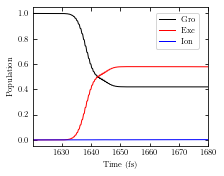

In [3]:
if os.path.exists(dir+"popu.dat"):
    data=np.loadtxt(dir+"Popu.dat")
elif os.path.exists(dir+"PopulationOfState.dat"):
    data = np.loadtxt(dir+"PopulationOfState.dat")
else:
    print("No PopulationOfState dataset found.")
plt.xlim(TimeTurn,TimeEnd)
ax=plt.plot(data[:,0],data[:,1],'k-',data[:,0],data[:,2],'r-',data[:,0],1-data[:,1]-data[:,2],'b-')
plt.legend(["Gro","Exc","Ion"],loc=(0.7,0.70))
plt.xlabel("Time ("+timeUnit+")")
plt.ylabel("Population")
plt.savefig(dir+"PopulationOfState."+figureType,dpi=figureDPI,bbox_inches="tight")

<Figure size 680.315x510.236 with 0 Axes>

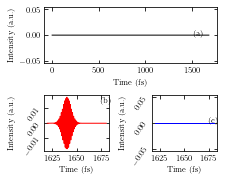

In [4]:
plt.figure(figsize=(cm_to_inch(24),cm_to_inch(18)))
data=np.loadtxt(dir+"Laser.dat")
x =data[:,0]
y1=data[:,1]
x2=data[turnPoint:,0]
y2=data[turnPoint:,2]
y3=data[turnPoint:,3]
import matplotlib.gridspec as gridspec
fig = plt.figure(tight_layout=True)
gs = gridspec.GridSpec(2, 2)
ax = fig.add_subplot(gs[0,:])
ax.plot(x,y1,'k-')#
#ax.set_xlim([-10,100])
x=x
y=y1
plt.text(min(x)+(max(x)-min(x))*0.9,min(y)+(max(y)-min(y))*0.9,"(a)")
ax.set_ylabel('Intensity (a.u.)')
ax.set_xlabel('Time (fs)')
for i in range(2):
    ax = fig.add_subplot(gs[1, i])
    if i==0:
        ax.plot(x2,y2,'r-')
        x=x2
        y=y2
        plt.text(min(x)+(max(x)-min(x))*0.9,min(y)+(max(y)-min(y))*0.9,"(b)")
    if i==1:
        ax.plot(x2,y3,'b-')
        x=x2
        y=y3
        plt.text(min(x)+(max(x)-min(x))*0.9,min(y)+(max(y)-min(y))*0.9,"(c)")
    ax.set_ylabel('Intensity (a.u.)')
    ax.set_xlabel('Time (fs)')
    # if i == 0:
    for tick in ax.get_yticklabels():
        tick.set_rotation(55)
fig.align_labels()  # same as fig.align_xlabels(); fig.align_ylabels()
plt.show()

Plot the Potential energy and dipole moment

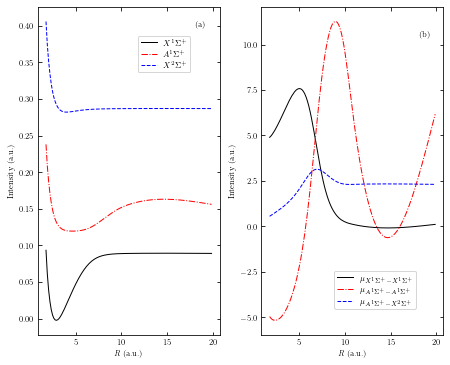

In [5]:

plt.figure(figsize=(cm_to_inch(16),cm_to_inch(13)))
plt.subplot(1,2,1)

if os.path.exists(dir+"pott.dat"):
    data=np.loadtxt(dir+"Pott.dat")
else:
    data=np.loadtxt(dir+"PotentialEnergy.dat")

x=data[:,0]
y1=data[:,1]
y2=data[:,2]
y3=data[:,3]
#plt.grid(False)
x=x
y=y3
plt.text(min(x)+(max(x)-min(x))*0.9,min(y)+(max(y)-min(y))*0.95,"(a)")
plt.xlabel('$\\textit{R}$ (a.u.)')
plt.ylabel("Intensity (a.u.)")
plt.plot(x,y1,'k-',x,y2,'r-.',x,y3,'b--')
plt.legend(['$X^1\Sigma^+$','$A^1 \Sigma ^+$','$X^2 \Sigma ^+$'],loc=(0.55,0.8))
plt.subplot(1,2,2)
if os.path.exists(dir+"Dipole.dat"):
    data=np.loadtxt(dir+"Dipole.dat")
else:
    data=np.loadtxt(dir+"DipoleMoment.dat")

x=data[:,0]
y=data[:,2]
plt.text(min(x)+(max(x)-min(x))*0.9,min(y)+(max(y)-min(y))*0.95,"(b)")
plt.xlabel("$\\textit{R}$  (a.u.)")
plt.ylabel("Intensity (a.u.)")
plt.plot(data[:,0],data[:,1],'k-',data[:,0],data[:,2],'r-.',data[:,0],data[:,3],'b--')
plt.legend(["$\mu_{X^1\Sigma^+ - X^1\Sigma^+} $","$\mu_{A^1\Sigma^+ - A^1\Sigma^+} $","$\mu_{A^1\Sigma^+ - X^2\Sigma^+} $"],loc=(0.4,0.08))
plt.tight_layout()
#plt.savefig(dir+"PotentialEnergyAndDipoleMent."+figureType,bbox_inches = 'tight',dpi=figureDPI)
plt.show()


Plot orientation and alignment of the groud state

0.33333333 0.07931334


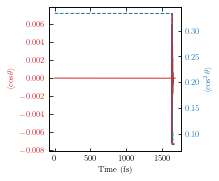

In [6]:
if os.path.exists(dir+"cos1.dat"):
    data=np.loadtxt(dir+"cos1.dat")
else:
    data=np.loadtxt(dir+"orientationAndAlignment.dat")

x=data[:,0]
y1=data[:,1]
y2=data[:,2]
print(max(y2),min(y2))
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Time ('+timeUnit+')')
ax1.set_ylabel('$\\langle{\\rm  cos} \\theta \\rangle$', color=color)
ax1.plot(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('$\\langle{\\rm cos^2} \\theta \\rangle$', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2,'--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(dir+"OrientationAndAlignment."+figureType,bbox_inches = 'tight',dpi=figureDPI)
plt.show()

Plot evolution of angle-resolved wave packets

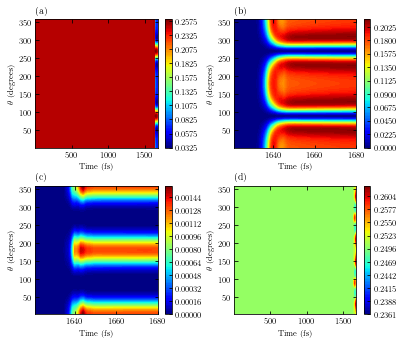

In [ ]:

#plt.figure(figsize=(12,9))
plt.figure(figsize=(cm_to_inch(16),cm_to_inch(13)))
import matplotlib.ticker as ticker
if os.path.exists(dir+"vgr_ang.dat"):
    plt.subplot(2,2,1)
    DataAng =np.loadtxt(dir+"vgr_ang.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.title("(a)",loc='left')
    plt.xlim(TimeBegin+1, TimeEnd )
    #plt.ylim(min(y),180)
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$\\theta$ (degrees)")
    plt.subplot(2,2,2)
    DataAng =np.loadtxt(dir+"Exc_ang.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.title("(b)",loc='left')
    plt.xlim(TimeTurn+1,TimeEnd)
    #plt.ylim(min(y),180)
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$\\theta$ (degrees)")
    plt.subplot(2,2,3)
    DataAng =np.loadtxt(dir+"Ion_ang.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.xlim(TimeTurn+1,TimeEnd)
    #plt.ylim(min(y),180)
    plt.title("(c)",loc='left')
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$\\theta$ (degrees)")
    plt.subplot(2,2,4)
    DataAng =np.loadtxt(dir+"TotalAngDis.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.title("(d)",loc='left')
    #plt.ylim(min(y),180)
    plt.tricontourf(x,y,z,levels,cmap='jet')
    #plt.colorbar(location='top',orientation='horizontal')
    plt.colorbar()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$\\theta$ (degrees)")
elif os.path.exists(dir+"GroAngWave.dat"):
    plt.subplot(2,2,1)
    DataAng =np.loadtxt(dir+"GroAngWave.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.title("(a)",loc='left')
    plt.xlim(TimeBegin+1, TimeEnd )
    #plt.ylim(min(y),180)
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$\\theta$ (degrees)")
    plt.subplot(2,2,2)
    DataAng =np.loadtxt(dir+"ExcAngWave.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.title("(b)",loc='left')
    plt.xlim(TimeTurn+1,TimeEnd)
    #plt.ylim(min(y),180)
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$\\theta$ (degrees)")
    plt.subplot(2,2,3)
    DataAng =np.loadtxt(dir+"IonAngWave.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.xlim(TimeTurn+1,TimeEnd)
    #plt.ylim(min(y),180)
    plt.title("(c)",loc='left')
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$\\theta$ (degrees)")
    plt.subplot(2,2,4)
    DataAng =np.loadtxt(dir+"TotalAngDis.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    #plt.ylim(min(y),180)
    plt.title("(d)",loc='left')
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.xlim(TimeTurn+1,TimeEnd)
    plt.colorbar()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$\\theta$ (degrees)")
else :
    print("No data available")
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)
plt.savefig(dir+"WaveAngDis."+figureType,bbox_inches = 'tight',dpi=figureDPI)
plt.show()


Plot evolution of internuclear distance-resolved wave packages

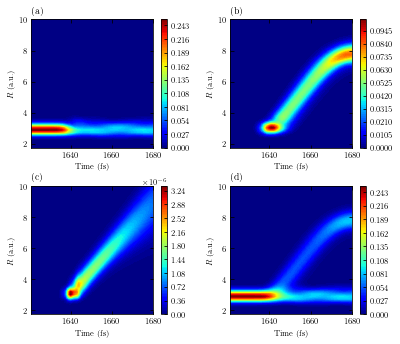

In [8]:
plt.figure(figsize=((16/2.54),(13/2.54)))
import matplotlib.ticker as ticker
if os.path.exists(dir+"vgr_rad.dat"):     
    plt.subplot(2,2,1)
    DataAng =np.loadtxt(dir+"vgr_rad.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.title("(a)",loc='left')
    plt.xlim(TimeTurn+1, TimeEnd )
    plt.ylim(1.75,10.0)
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    # cb=plt.colorbar(format='%.1e')
    # tick_locator = ticker.MaxNLocator(nbins=5)
    # cb.locator=tick_locator
    # cb.update_ticks()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$R$ (a.u.)")
    plt.subplot(2,2,2)
    DataAng =np.loadtxt(dir+"Exc_rad.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.title("(b)",loc='left')
    plt.xlim(TimeTurn+1,TimeEnd)
    plt.ylim(1.75,10.0)
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    # cb=plt.colorbar(format='%.1e')
    # tick_locator = ticker.MaxNLocator(nbins=5)
    # cb.locator=tick_locator
    # cb.update_ticks()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$R$ (a.u.)")
    plt.subplot(2,2,3)
    DataAng =np.loadtxt(dir+"Ion_rad.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.xlim(TimeTurn+1,TimeEnd)
    plt.ylim(1.75,10.0)
    plt.title("(c)",loc='left')
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    # cb=plt.colorbar(format='%.1e')
    # tick_locator = ticker.MaxNLocator(nbins=5)
    # cb.locator=tick_locator
    # cb.update_ticks()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$R$ (a.u.)")
    plt.subplot(2,2,4)
    DataAng =np.loadtxt(dir+"TotalRadDis.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.xlim(TimeTurn+1,TimeEnd)
    plt.ylim(1.75,10.0)
    plt.title("(d)",loc='left')
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    # cb=plt.colorbar(format='%.1e')
    # tick_locator = ticker.MaxNLocator(nbins=5)
    # cb.locator=tick_locator
    # cb.update_ticks()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$R$ (a.u.)")
elif os.path.exists(dir+"GroRadWave.dat"):
    plt.subplot(2,2,1)
    DataAng =np.loadtxt(dir+"GroRadWave.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.title("(a)",loc='left')
    plt.xlim(TimeTurn+1, TimeEnd )
    plt.ylim(1.75,10.0)
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$R$ (a.u.)")
    plt.subplot(2,2,2)
    DataAng =np.loadtxt(dir+"ExcRadWave.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.title("(b)",loc='left')
    plt.xlim(TimeTurn+1,TimeEnd)
    plt.ylim(1.75,10.0)
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$R$ (a.u.)")
    plt.subplot(2,2,3)
    DataAng =np.loadtxt(dir+"IonRadWave.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.xlim(TimeTurn+1,TimeEnd)
    plt.ylim(1.75,10.0)
    plt.title("(c)",loc='left')
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$R$ (a.u.)")
    plt.subplot(2,2,4)
    DataAng =np.loadtxt(dir+"TotalRadDis.dat")
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataAng[:,0]
    y=DataAng[:,1]
    z=DataAng[:,2]
    plt.xlim(TimeTurn+1,TimeEnd)
    plt.ylim(1.75,10.0)
    plt.title("(d)",loc='left')
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel("Time ("+timeUnit+")")
    plt.ylabel("$R$ (a.u.)")
else:
    print("No rad-resovled wave data available")
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)
#fig.subplots_adjust(right=0.9)
# p = add_axes([0.92, 0.12, 0.015, .78 ])#位置[左,下,右,上]
# cb = fig.colorbar(sp4, cax=p)
plt.savefig(dir+"WaveRadDis."+figureType,bbox_inches = 'tight',dpi=figureDPI)
plt.show()


Plot population of electronic states

Plot population of vibrational states

nx=  34  ny=  50
xMax=  1679.4000250250103  xMin=  49.90000074356795  yMax=  49.0  yMin=  0.0
x[50] 99.8000014871359
49.90000074356795
[[9.99999998e-01 9.99999998e-01 9.99999998e-01 ... 9.99999998e-01
  9.99999868e-01 0.00000000e+00]
 [1.88929734e-12 7.47186674e-12 1.64820181e-11 ... 2.00579907e-11
  5.91013800e-12 0.00000000e+00]
 [2.14463022e-13 8.60172295e-13 1.93659445e-12 ... 2.15300600e-10
  9.12252739e-11 0.00000000e+00]
 ...
 [8.73885476e-15 3.67520568e-15 2.93131931e-15 ... 8.04530640e-15
  7.48641989e-14 0.00000000e+00]
 [5.83691657e-15 6.12807288e-15 1.42946746e-17 ... 7.86789547e-15
  2.75012512e-13 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
nx=  33  ny=  50
xMax=  1679.4000250250103  xMin=  49.90000074356795  yMax=  49.0  yMin=  0.0
x[50] 99.8000014871359
49.90000074356795
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]


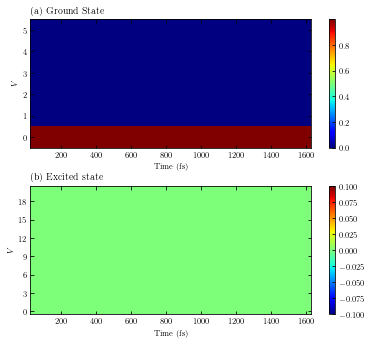

In [9]:
from matplotlib.ticker import MaxNLocator
plt.figure(figsize=(cm_to_inch(16),cm_to_inch(13)))
ax1=plt.subplot(2,1,1)
DataPop =np.loadtxt(dir+"p_vgr_v.dat")
#plt.style.use('_mpl-gallery-nogrid')
x=DataPop[:,0]
y=DataPop[:,1]
z=DataPop[:,2]
ny=int((max(y)-min(y))/(y[2]-y[1]))+1
nx=int((max(x)-min(x))/(x[ny]-x[0]))+1+1
zMesh=np.zeros((ny,nx))
for i in range(1,nx):
    for j in range(1,ny):
        zMesh[j-1,i-1]=z[(i-1)*ny+j-1]
print('nx= ',nx,' ny= ',ny)
print('xMax= ',max(x),' xMin= ',min(x),' yMax= ',max(y),' yMin= ',min(y))
print('x[50]',x[50])
print(x[0])
print(zMesh)
xMesh=np.linspace(min(x),max(x),nx)
yMesh=np.linspace(min(y),max(y),ny)
#xx,yy,zz=np.meshgrid(xMesh,yMesh,zMesh)
plt.pcolormesh(xMesh,yMesh,zMesh,cmap='jet')
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.title("(a) Ground State",loc='left')
plt.xlim(x[0]/2,max(x)-x[0])
plt.ylim(-0.5,5.5)
plt.xlabel('Time ('+timeUnit+')')
plt.ylabel('$V$')
plt.colorbar()
ax2=plt.subplot(2,1,2)
DataPop =np.loadtxt(dir+"p_exc_v.dat")
#plt.style.use('_mpl-gallery-nogrid')
x=DataPop[:,0]
y=DataPop[:,1]
z=DataPop[:,2]
ny=int((max(y)-min(y))/(y[2]-y[1]))+1
nx=int((max(x)-min(x))/(x[ny]-x[0]))+1
zMesh=np.zeros((ny,nx))
for i in range(1,nx):
    for j in range(1,ny):
        zMesh[j-1,i-1]=z[(i-1)*ny+j-1]
print('nx= ',nx,' ny= ',ny)
print('xMax= ',max(x),' xMin= ',min(x),' yMax= ',max(y),' yMin= ',min(y))
print('x[50]',x[50])
print(x[0])
print(zMesh)
xMesh=np.linspace(min(x),max(x),nx)
yMesh=np.linspace(min(y),max(y),ny)
#xx,yy,zz=np.meshgrid(xMesh,yMesh,zMesh)
plt.pcolormesh(xMesh,yMesh,zMesh,cmap='jet')
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.title("(b) Excited state",loc='left')
plt.xlabel('Time ('+timeUnit+')')
plt.ylabel('$V$')
plt.xlim(x[0]/2,max(x)-x[0])
plt.ylim(-0.5,20.5)
plt.colorbar()
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.3)
plt.savefig(dir+"P_v."+figureType,bbox_inches = 'tight',dpi=figureDPI)

Plot orientation and alignment of the electronic states

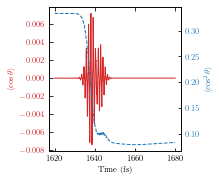

In [10]:
data=np.loadtxt(dir+"ori_ali_1.dat")
x=data[:,0]
y1=data[:,1]
y2=data[:,2]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time ('+timeUnit+')')
ax1.set_ylabel('$\\langle{\\rm cos\\, } \\theta \\rangle$', color=color)
ax1.plot(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('$\\langle {\\rm cos^2} \\theta \\rangle$', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2,'--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(dir+"GroundAlignmentAndOrientation."+figureType,bbox_inches = 'tight',dpi=figureDPI)
plt.show()

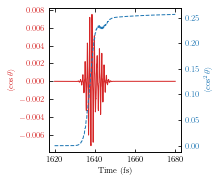

In [11]:
data=np.loadtxt(dir+"ori_ali_2.dat")
x=data[:,0]
y1=data[:,1]
y2=data[:,2]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time ('+timeUnit+')')
ax1.set_ylabel('$\\langle{\\rm cos\\, } \\theta \\rangle$', color=color)
ax1.plot(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('$\\langle {\\rm cos^2} \\theta \\rangle$', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2,'--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(dir+"ExcitedAlignmentAndOrientation."+figureType,bbox_inches = 'tight',dpi=figureDPI)
plt.show()

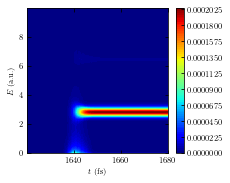

In [12]:
plt.figure(figsize=(8/2.54,6.8/2.54))
DataAng =np.loadtxt(dir+"timeenergyspctra.dat")
#DataAng=scipy.ndimage.zoom(DataAng,1)
#plt.style.use('_mpl-gallery-nogrid')
x=DataAng[:,0]
y=DataAng[:,1]
z=DataAng[:,2]
# plt.xlim(-5, 5)
# plt.ylim(-5, 5)
ax=plt.tricontourf(x,y,z,levels,cmap='jet')

#interpolation='spline16'
plt.colorbar()
plt.xlabel("$t$ ("+timeUnit+")")
plt.ylabel("$E$ (a.u.)")
plt.savefig(dir+"timeenergyspctra."+figureType,bbox_inches = 'tight',transparent=True,dpi=figureDPI)
plt.show()

In [13]:
os.startfile(dir)

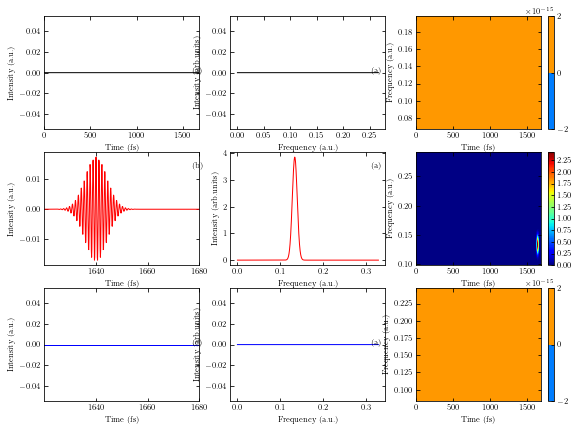

In [14]:
if os.path.exists(dir+"TimFreDis1.dat"):
    plt.figure(figsize=(24/2.54,18/2.54))
    data=np.loadtxt(dir+"Laser.dat")


    x1=data[:,0]
    y1=data[:,1]
    y2=data[:,2]
    y3=data[:,3]

    plt.subplot(3,3,1)
    #plt.grid(False)
    x=x1
    y=y1
    plt.text(min(x)+(max(x)-min(x))*0.95,min(y)+(max(y)-min(y))*0.9,"(a)")
    plt.xlabel('Time ('+timeUnit+')')
    plt.ylabel("Intensity (a.u.)")
    plt.xlim(TimeBegin,TimeEnd)
    plt.plot(x1,y1,'k-')

    plt.subplot(3,3,2)
    dataf=np.loadtxt(dir+"FreDis1.dat")
    x=dataf[:,0]
    y=dataf[:,1]
    #plt.grid(False)
    plt.text(min(x)+(max(x)-min(x))*0.95,min(y)+(max(y)-min(y))*0.9,"(a)")
    plt.xlabel('Frequency (a.u.)')
    plt.ylabel("Intensity (arb.units)")
    plt.plot(x,y,'k-')

    plt.subplot(3,3,3)
    dataf=np.loadtxt(dir+"TimFreDis1.dat")
    x=dataf[:,0]
    y=dataf[:,1]
    z=dataf[:,2]
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel('Time ('+timeUnit+')')
    plt.ylabel('Frequency (a.u.)')

    plt.subplot(3,3,4)
    #plt.grid(False)
    #plt.title("(b)",loc="left")
    plt.xlabel('Time ('+timeUnit+')')
    plt.ylabel("Intensity (a.u.)")
    plt.xlim(TimeTurn,TimeEnd)
    plt.plot(x1,y2,'r-')
    x=x1
    y=y2
    plt.text(TimeTurn+(TimeEnd-TimeTurn)*0.95,min(y)+(max(y)-min(y))*0.9,"(b)")
    plt.subplot(3,3,5)
    dataf=np.loadtxt(dir+"FreDis2.dat")
    x=dataf[:,0]
    y=dataf[:,1]
    #plt.grid(False)
    plt.text(min(x)+(max(x)-min(x))*0.95,min(y)+(max(y)-min(y))*0.9,"(a)")
    plt.xlabel('Frequency (a.u.)')
    plt.ylabel("Intensity (arb.units)")
    plt.plot(x,y,'r-')

    plt.subplot(3,3,6)
    dataf=np.loadtxt(dir+"TimFreDis2.dat")
    x=dataf[:,0]
    y=dataf[:,1]
    z=dataf[:,2]
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.xlabel('Time ('+timeUnit+')')
    plt.ylabel('Frequency (a.u.)')
    plt.subplot(3,3,7)
    #plt.grid(False)
    x=x1
    y=y3
    plt.text(TimeTurn+(TimeEnd-TimeTurn)*0.95,min(y)+(max(y)-min(y))*0.9,"(c)")

    plt.xlabel('Time ('+timeUnit+')')
    plt.ylabel("Intensity (a.u.)")
    plt.xlim(TimeTurn,TimeEnd)
    plt.plot(x1,y3,'b-')
    plt.subplot(3,3,8)
    dataf=np.loadtxt(dir+"FreDis3.dat")
    x=dataf[:,0]
    y=dataf[:,1]
    #plt.grid(False)
    plt.text(min(x)+(max(x)-min(x))*0.95,min(y)+(max(y)-min(y))*0.9,"(a)")
    plt.xlabel('Frequency (a.u.)')
    plt.ylabel("Intensity (arb.units)")
    plt.plot(x,y,'b-')
    plt.subplot(3,3,9)
    dataf=np.loadtxt(dir+"TimFreDis3.dat")
    x=dataf[:,0]
    y=dataf[:,1]
    z=dataf[:,2]
    plt.xlabel('Time ('+timeUnit+')')
    plt.ylabel('Frequency (a.u.)')
    plt.tricontourf(x,y,z,levels,cmap='jet')
    plt.colorbar()
    plt.savefig(dir+"TimFreDis."+figureType,dpi=figureDPI)

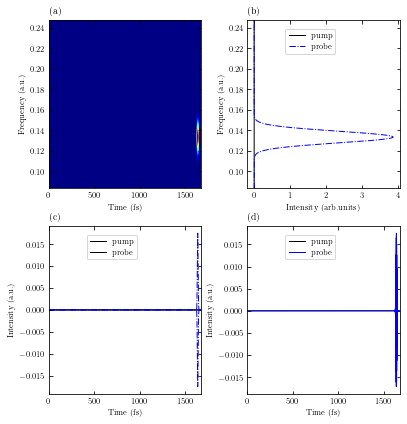

In [15]:
if os.path.exists(dir+'FreDis1.dat'):
    legengLoc=(0.25,0.8)
    plt.figure(figsize=((16/2.54),(13/2)))
    #plt.figure(figsize=(8,6))
    titleLoc="left"
    plt.subplot(2,2,1)
    plt.title("(a)",loc=titleLoc)
    data=np.loadtxt(dir+"TimFreDis4.dat")
    x=data[:,0]
    y=data[:,1]
    z=data[:,2]
    plt.xlabel("Time (fs)")
    plt.ylabel("Frequency (a.u.)")
    plt.tricontourf(x,y,z,100,cmap='jet')
    #plt.colorbar()
    plt.subplot(2,2,2)
    plt.title("(b)",loc=titleLoc)
    data1=np.loadtxt(dir+"FreDis1.dat")
    data2=np.loadtxt(dir+"FreDis2.dat")
    data3=np.loadtxt(dir+"FreDis3.dat")
    x1=data1[:,0]
    y1=data1[:,1]
    x2=data2[:,0]
    y2=data2[:,1]
    x3=data3[:,0]
    y3=data3[:,1]
    plt.xlabel("Intensity (arb.units)") 
    plt.ylabel("Frequency (a.u.)")
    #plt.xlim(0,5)
    plt.ylim(min(np.loadtxt(dir+"TimFreDis4.dat")[:,1]),max(np.loadtxt(dir+"TimFreDis4.dat")[:,1]))
    plt.plot(y1,x1,"k-",y2,x2,'b-.')
    #plt.legend(["P 1","P 2","P 3"],loc=legengLoc)
    plt.legend(["pump","probe"],loc=legengLoc)
    plt.subplot(2,2,3)
    data=np.loadtxt(dir+"Laser.dat")
    x=data[:,0]
    y1=data[:,4]
    y2=data[:,5]
    y3=data[:,6]
    plt.xlim(min(x),max(x))
    plt.title("(c)",loc=titleLoc)
    plt.plot(x,y1,'k-',x,-y1,'k-',x,y2,'b-.',x,-y2,'b-.')
    plt.xlabel("Time (fs)")
    plt.ylabel("Intensity (a.u.)")
    #plt.legend(["P 1","P 2","P 3"],loc=legengLoc)
    plt.legend(["pump","probe"],loc=legengLoc)
    plt.subplot(2,2,4)
    plt.title("(d)",loc=titleLoc)
    data=np.loadtxt(dir+"Laser.dat")
    x1=data[:,0]
    y1=data[:,1]
    y2=data[:,2]
    y3=data[:,3]
    plt.xlim(min(x),max(x))
    plt.xlabel("Time (fs)")
    plt.ylabel("Intensity (a.u.)")

    plt.plot(x1,y1,'k-',x,y2,'b-',)
    #plt.legend(["P 1","P 2","P 3"],loc=legengLoc)
    plt.legend(["pump","probe"],loc=legengLoc)


    plt.subplots_adjust(left=0.125,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.3, 
                        hspace=0.22)
    plt.savefig(dir+"TimeFrequencyDistribution."+figureType,bbox_inches = 'tight',dpi=figureDPI)

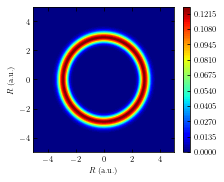

In [16]:
import scipy.ndimage
plt.figure(figsize=(8/2.54,6.8/2.54))
if os.path.exists(dir+"wave2d.dat"):
    DataAng =np.loadtxt(dir+"wave2d.dat")
else:   
    DataAng =np.loadtxt(dir+"InitialWavePacket.dat")
#DataAng=scipy.ndimage.zoom(DataAng,1)
#plt.style.use('_mpl-gallery-nogrid')
x=DataAng[:,0]
y=DataAng[:,1]
z=DataAng[:,2]
plt.xlim(-5, 5)
plt.ylim(-5, 5)
ax=plt.tricontourf(x,y,z,levels,cmap='jet')

#interpolation='spline16'
plt.colorbar()
plt.xlabel("$\tR$ (a.u.)")
plt.ylabel("$\tR$ (a.u.)")
#plt.savefig(dir+"InitialWavePacket."+figureType,bbox_inches = 'tight',transparent=True,dpi=figureDPI)
plt.show()

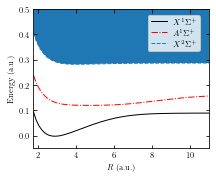

In [17]:
if os.path.exists(dir+'pott.dat'):
    data=np.loadtxt(dir+"Pott.dat")
else:
    data=np.loadtxt(dir+"PotentialEnergy.dat")

x=data[:,0]
y1=data[:,1]
y2=data[:,2]
y3=data[:,3]
plt.xlabel("$\t{R}$ (a.u.) ")
plt.ylabel("Energy (a.u.)")
plt.plot(x,y1,'k-',x,y2,'r-.',x,y3,'--')
plt.ylim(-0.05,0.5)
plt.xlim(1.75,11.)
plt.fill_between(x,y3,x,y3+0.2)
plt.legend(['$X^1\Sigma^+$','$A^1 \Sigma ^+$','$X^2 \Sigma ^+$'],loc=(0.65,0.7))
plt.savefig(dir+"pott."+figureType,bbox_inches="tight",transparent=True,dpi=figureDPI)

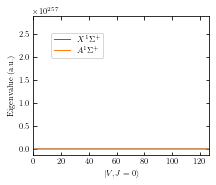

In [18]:
if os.path.exists(dir+'InitialEigenvalue.dat'):
    data=np.loadtxt(dir+'InitialEigenvalue.dat')
elif os.path.exists(dir+'eig.dat'):
    data=np.loadtxt(dir+'eig.dat')
x=data[:,0]
y1=data[:,1]
y2=data[:,2]
plt.step(x,y1,x,y2)
plt.xlim(0,127)
plt.xlabel('$|V,J=0\\rangle$')
plt.ylabel('Eigenvalue (a.u.)')
plt.legend(['$X^1\Sigma^+$','$A^1 \Sigma ^+$'],loc=(0.1,0.7))
plt.savefig(dir+"EigenvalueOfVib."+figureType,bbox_inches="tight",transparent=True,dpi=figureDPI)
plt.show()

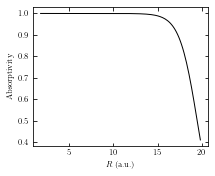

In [19]:
if os.path.exists(dir+'absb.dat'):
    data=np.loadtxt(dir+'Absb.dat') #get data form dir+'absb.dat'
else:
    data=np.loadtxt(dir+'Absorption.dat')
x=data[:,0]
y1=data[:,1]
plt.xlabel("$\t{R}$ (a.u.) ")
plt.ylabel("Absorptivity")
#x=x
#y=y1
#plt.text(min(x)+(max(x)-min(x))*0.95,min(y)+(max(y)-min(y))*0.95,"(a)")
plt.plot(x,y1,'k-')
#plt.savefig(dir+"Absorption."+figureType,bbox_inches="tight",transparent=True,dpi=figureDPI)
plt.show()

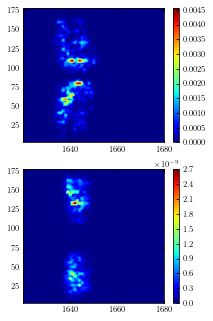

In [20]:
plt.figure(figsize=(8/2.54,13/2.54))
plt.subplot(2,1,1)
data=np.loadtxt(dir+"qua_int_ang.dat")
x=data[:,0]
y=data[:,1]
z1=data[:,2]
z2=data[:,3]
plt.tricontourf(x,y,z1,levels,cmap='jet')
plt.colorbar()
plt.xlim(TimeTurn,TimeEnd)
plt.subplot(2,1,2)
plt.tricontourf(x,y,z2,levels,cmap='jet')
plt.colorbar()
plt.xlim(TimeTurn,TimeEnd)
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.2)
plt.savefig(dir+"QuaIntAng."+figureType,bbox_inches = 'tight',transparent=True,dpi=figureDPI)
plt.show()

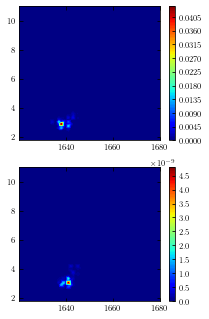

In [21]:
plt.figure(figsize=(8/2.54,13/2.54))
data=np.loadtxt(dir+"qua_int_rad.dat")
x=data[:,0]
y=data[:,1]
z1=data[:,2]
z2=data[:,3]
plt.subplot(2,1,1)
plt.tricontourf(x,y,z1,levels,cmap='jet')#,vmin=0.0,vmax=0.1)
plt.colorbar()
plt.xlim(TimeTurn,TimeEnd)
plt.ylim(min(y),11)
plt.subplot(2,1,2)
plt.tricontourf(x,y,z2,levels,cmap='jet')
plt.colorbar()
plt.xlim(TimeTurn,TimeEnd)
plt.ylim(min(y),11)
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.2)
plt.savefig(dir+"QuaIntRad."+figureType,bbox_inches = 'tight',transparent=True,dpi=figureDPI)
plt.show()

In [22]:
return

SyntaxError: 'return' outside function (3438313781.py, line 1)

In [ ]:
plt.figure(figsize=((16/2.54),(13/2.54)))
from matplotlib.ticker import MaxNLocator
#timeP="20"
fileList =os.listdir(dir+"p_vgr_vj\\")
print(fileList)
image_list=list()
print("Checking image list")
n=len(fileList)
for ii in range(n):
    s1=dir+"p_vgr_vj\\"+str(fileList[ii])
    s2=dir+"p_exc_vj\\"+str(fileList[ii])
    ax1=plt.subplot(1,2,1)
    DataPop =np.loadtxt(s1)
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataPop[:,0]
    y=DataPop[:,1]
    z=DataPop[:,2]
    ny=int((max(y)-min(y))/(y[2]-y[1]))+1
    nx=int((max(x)-min(x))/(x[ny]-x[0]))+1
    zMesh=np.zeros((ny,nx))
    for i in range(1,nx):
        for j in range(1,ny):
            zMesh[j-1,i-1]=z[(i-1)*ny+j-1]
    print('nx= ',nx,' ny= ',ny)
    print('xMax= ',max(x),' xMin= ',min(x),' yMax= ',max(y),' yMin= ',min(y))
    print('x[50]',x[50])
    print(x[0])
    print(zMesh)
    xMesh=np.linspace(min(x),max(x),nx)
    yMesh=np.linspace(min(y),max(y),ny)
    #xx,yy,zz=np.meshgrid(xMesh,yMesh,zMesh)
    plt.pcolormesh(xMesh,yMesh,zMesh,cmap='jet')
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlim(-0.5,19.5)
    plt.ylim(-0.5,19.5)
    plt.xlabel('$V$')
    plt.ylabel('$J$')
    plt.title("(a) Ground state, $t$ = "+fileList[ii][11:17]+" fs",loc='left')
    plt.colorbar()
    ax2=plt.subplot(1,2,2)
    DataPop =np.loadtxt(s2)
    #plt.style.use('_mpl-gallery-nogrid')
    x=DataPop[:,0]
    y=DataPop[:,1]
    z=DataPop[:,2]
    ny=int((max(y)-min(y))/(y[2]-y[1]))+1
    nx=int((max(x)-min(x))/(x[ny]-x[0]))+1
    zMesh=np.zeros((ny,nx))
    for i in range(1,nx):
        for j in range(1,ny):
            zMesh[j-1,i-1]=z[(i-1)*ny+j-1]
    print('nx= ',nx,' ny= ',ny)
    print('xMax= ',max(x),' xMin= ',min(x),' yMax= ',max(y),' yMin= ',min(y))
    print('x[50]',x[50])
    print(x[0])
    print(zMesh)
    xMesh=np.linspace(min(x),max(x),nx)
    yMesh=np.linspace(min(y),max(y),ny)
    #xx,yy,zz=np.meshgrid(xMesh,yMesh,zMesh)
    plt.pcolormesh(xMesh,yMesh,zMesh,cmap='jet')
    ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.title("(b) Excited state, $t$ = "+fileList[ii][11:17]+" fs",loc='left')
    plt.xlabel('$V$')
    plt.ylabel('$J$')
    plt.xlim(-0.5,19.5)
    plt.ylim(-0.5,19.5)
    plt.colorbar()
    plt.subplots_adjust(left=0.125,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.25, 
                        hspace=0.2)
    plt.savefig(dir+"p_vgr_vj\\"+fileList[ii][:17]+"."+figureType,bbox_inches = 'tight',dpi=figureDPI)


In [ ]:

import  imageio
import os
def compose_gif(image_list,gif_name,myduration):
    frames=[]
    for image_name in image_list:
        frames.append(imageio.imread(image_name))
    imageio.mimsave(gif_name,frames,'GIF',duration=myduration)
    
    return
    
gif_name = "P_VJ.gif"
fileList =os.listdir(dir+"p_vgr_vj\\")
print(fileList)
image_list=list()
print("Checking image list")
n=len(fileList)
for i in range(n):
    s=dir+"p_vgr_vj\\"+str(fileList[i])
    if s[-5:]==".jpeg":
        image_list.append(s)
        
        
print(image_list)
myduration=0.3#eval(input("duration: s"))
compose_gif(image_list,dir+gif_name,myduration)
print("Created")    

In [ ]:

fileList =os.listdir(dir+"wave\\")
print(fileList)
dat_list=list()
print("Checking image list")
n=len(fileList)
for i in range(n):
    s=dir+"wave\\"+str(fileList[i])
    if s[-4:]==".dat":
        dat_list.append(s)
        
        
print(dat_list)
for i in range(n):
    
    data=np.loadtxt(dat_list[i])
    x=data[:,0]
    y=data[:,1]
    z1=data[:,2]
    z2=data[:,3]
    z3=data[:,4]
    z4=z1+z2+z3

    plt.figure(figsize=(16/2.54,12.5/2.54))
    
    #fig=plt.subplots(2,2)
    #fig.title("$t$ = "+fileList[i][11:13]+" fs")
    plt.subplot(2,2,1)
    plt.tricontourf(x,y,z1,levels,cmap='jet')
    plt.title('(a)',loc='left')
    plt.xlim(-11,11)
    plt.ylim(-11,11)
    plt.xlabel("$R$ (a.u.)")
    plt.ylabel("$R$ (a.u.)")
    plt.colorbar()
    plt.subplot(2,2,2)
    plt.tricontourf(x,y,z2,levels,cmap='jet')
    plt.title('(b)',loc='left')
    plt.xlim(-11,11)
    plt.ylim(-11,11)
    plt.xlabel("$R$ (a.u.)")
    plt.ylabel("$R$ (a.u.)")
    plt.colorbar()
    plt.subplot(2,2,3)
    plt.tricontourf(x,y,z3,levels,cmap='jet')
    plt.title('(c)',loc='left')
    plt.colorbar()
    plt.xlim(-11,11)
    plt.ylim(-11,11)
    plt.xlabel("$R$ (a.u.)")
    plt.ylabel("$R$ (a.u.)")
    plt.subplot(2,2,4)
    plt.tricontourf(x,y,z4,levels,cmap='jet')
    plt.title('(d)',loc='left')
    plt.xlim(-11,11)
    plt.ylim(-11,11)
    plt.xlabel("$R$ (a.u.)")
    plt.ylabel("$R$ (a.u.)")
    plt.colorbar()
    plt.subplots_adjust(left=0.125,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.3, 
                        hspace=0.3)
    plt.savefig(dir+"wave\\"+fileList[i][:16]+"."+figureType,bbox_inches = 'tight',dpi=figureDPI)
    plt.show()
 


In [ ]:
gif_name = "Wave.gif"
fileList =os.listdir(dir+"wave\\")
print(fileList)
image_list=list()
print("Checking image list")
n=len(fileList)
for i in range(n):
    s=dir+"wave\\"+str(fileList[i])
    if s[-5:]==".jpeg":
        image_list.append(s)
        
        
print(image_list)
myduration=0.3#eval(input("duration: s"))
compose_gif(image_list,dir+gif_name,myduration)
print("Created")   

In [ ]:
r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(False)
ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()